In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
iris_df = pd.read_csv("iris.csv")
iris_df

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
iris_df.rename(columns={'150':'Sepal length','4':'Sepal width','setosa':'Petal length','versicolor':'Petal width','virginica':'Species'},inplace=True)
iris_df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [76]:
X = iris_df.iloc[:,:-1].values
y = iris_df.iloc[:,4].values
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [0]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [78]:
# training object

print("X train:",X_train)

X train: [[6.9 3.1 5.1 2.3]
 [7.2 3.2 6.  1.8]
 [5.8 2.7 3.9 1.2]
 [5.1 3.4 1.5 0.2]
 [6.1 2.8 4.  1.3]
 [6.3 2.8 5.1 1.5]
 [6.9 3.2 5.7 2.3]
 [7.7 3.8 6.7 2.2]
 [6.4 3.2 5.3 2.3]
 [7.2 3.  5.8 1.6]
 [7.4 2.8 6.1 1.9]
 [5.1 3.5 1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [6.4 3.2 4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.4 3.4 1.7 0.2]
 [5.5 2.4 3.7 1. ]
 [6.6 3.  4.4 1.4]
 [6.4 2.7 5.3 1.9]
 [4.4 3.  1.3 0.2]
 [5.2 2.7 3.9 1.4]
 [6.  3.4 4.5 1.6]
 [4.6 3.1 1.5 0.2]
 [6.7 3.3 5.7 2.1]
 [5.  3.3 1.4 0.2]
 [6.5 3.  5.2 2. ]
 [5.  2.  3.5 1. ]
 [4.8 3.  1.4 0.1]
 [6.3 2.5 4.9 1.5]
 [6.  3.  4.8 1.8]
 [6.4 2.8 5.6 2.1]
 [5.6 2.9 3.6 1.3]
 [6.7 2.5 5.8 1.8]
 [5.  3.2 1.2 0.2]
 [5.6 2.5 3.9 1.1]
 [4.7 3.2 1.6 0.2]
 [5.6 3.  4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [6.3 3.4 5.6 2.4]
 [5.9 3.  5.1 1.8]
 [6.  2.2 4.  1. ]
 [6.3 2.9 5.6 1.8]
 [5.1 3.5 1.4 0.3]
 [6.3 3.3 4.7 1.6]
 [6.2 2.2 4.5 1.5]
 [5.5 2.5 4.  1.3]
 [5.  3.4 1.5 0.2]
 [5.4 3.  4.5 1.5]
 [4.9 3.  1.4 0.2]
 [5.4 3.4 1.5 0.4]
 [5

In [79]:
#shape of train and test object
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


In [80]:
#evaluating the algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))


[[17  0  0]
 [ 0 14  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [81]:
#Try running from k=1 through 50 and perform cross validation to get error values

from sklearn.model_selection import cross_val_score

k_range = list(np.arange(1,50))
scores,val_scores,errorlist = [],[],[]
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    scores = cross_val_score(knn_model, X_train, y_train, scoring = 'accuracy', cv=5)
    val_scores.append(scores.mean())
for value in val_scores:
    errorlist.append(1-value)

errorlist

[0.06666666666666676,
 0.06666666666666676,
 0.05714285714285727,
 0.04761904761904778,
 0.03809523809523818,
 0.04761904761904778,
 0.01904761904761898,
 0.01904761904761898,
 0.01904761904761898,
 0.01904761904761898,
 0.01904761904761898,
 0.028571428571428692,
 0.01904761904761898,
 0.028571428571428692,
 0.028571428571428692,
 0.028571428571428692,
 0.028571428571428692,
 0.028571428571428692,
 0.03809523809523818,
 0.04761904761904767,
 0.03809523809523818,
 0.03809523809523818,
 0.04761904761904767,
 0.04761904761904767,
 0.03809523809523818,
 0.03809523809523818,
 0.03809523809523818,
 0.04761904761904767,
 0.06666666666666676,
 0.08571428571428574,
 0.06666666666666676,
 0.06666666666666676,
 0.07619047619047625,
 0.08571428571428574,
 0.07619047619047625,
 0.08571428571428574,
 0.07619047619047625,
 0.07619047619047625,
 0.07619047619047625,
 0.09523809523809523,
 0.08571428571428574,
 0.10476190476190472,
 0.09523809523809523,
 0.10476190476190472,
 0.09523809523809523,
 0.1

In [82]:
#finding minimum error value and returning the index position of it to find the best K

optimal_k_value = k_range[errorlist.index(min(errorlist))]
optimal_model = KNeighborsClassifier(n_neighbors=optimal_k_value).fit(X_train,y_train)

#finding the accuracy for the best k value

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, optimal_model.predict(X_test))
print("Accuracy for optimal K value = {0} is {1}".format(optimal_k_value, (accuracy*100)))


Accuracy for optimal K value = 7 is 95.55555555555556


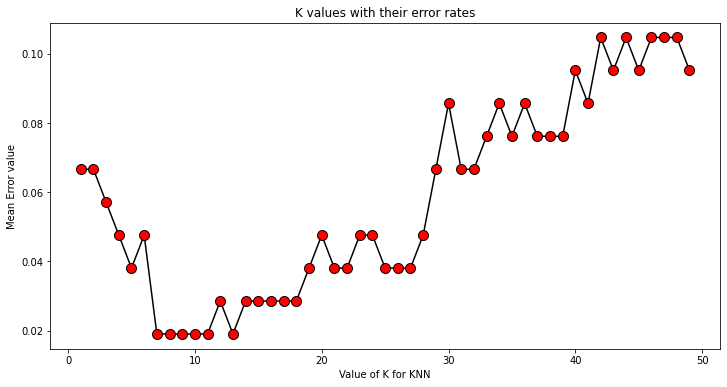

In [83]:
#plot the relationship between K and the error value

plt.figure(figsize=(12,6))
plt.plot(k_range,errorlist,color="black",marker="o",markerfacecolor="red",markersize=10)
plt.title("K values with their error rates")
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Error value')
plt.show()